In [2]:
import pandas as pd
import os, sys

In [5]:
working_dir = os.getcwd()
parrent_dir = os.path.dirname(working_dir)
sys.path.insert(0,parrent_dir)

In [4]:
os.path.join(os.path.dirname(working_dir), 'scripts')

'c:\\Users\\Abreham\\Documents\\Ml_projects\\Bati-bank-credit-scoring\\scripts'

In [ ]:
# notebook_dir = os.getcwd()  # Get the directory of the current notebook
# script_dir = os.path.join(notebook_dir) 
# script_dir

In [6]:
file_path = os.path.join('../datasets/', 'data.xlsx')

In [8]:
from scripts.eda_Pipeline import EDAPipeline

In [9]:
pipeline = EDAPipeline()
df = pipeline.load_data(file_path)

2025-01-25 10:20:53,655 - INFO - Loading data from: ../datasets/data.xlsx
2025-01-25 10:21:10,202 - INFO - Data loaded successfully with shape: (95662, 16)


In [10]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15T02:19:08Z,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,NaN,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15T03:32:55Z,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0


In [11]:
pipeline.identify_missing_values(df)

2025-01-25 10:21:17,013 - INFO - Identifying missing values
2025-01-25 10:21:17,014 - INFO - Missing Values:
TransactionId           0
BatchId                 0
AccountId               2
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             2
ProviderId              2
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   3
TransactionStartTime    1
PricingStrategy         3
FraudResult             0
dtype: int64
2025-01-25 10:21:17,015 - INFO - Missing Values:
TransactionId           0.000000
BatchId                 0.000000
AccountId               0.002091
SubscriptionId          0.000000
CustomerId              0.000000
CurrencyCode            0.000000
CountryCode             0.002091
ProviderId              0.002091
ProductId               0.000000
ProductCategory         0.000000
ChannelId               0.000000
Amount                  0.000000
Value            

In [12]:
pipeline.summarize_data(df)

2025-01-25 10:21:36,372 - INFO - Performing summary statistics
2025-01-25 10:21:36,372 - INFO - Number of rows: 95662
2025-01-25 10:21:36,373 - INFO - Number of columns: 16
2025-01-25 10:21:36,375 - INFO - Data types: 
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode             float64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                   float64
TransactionStartTime     object
PricingStrategy         float64
FraudResult               int64
dtype: object
2025-01-25 10:21:36,380 - INFO - First 5 rows of the DataFrame:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_

2025-01-25 10:02:02,387 - INFO - Performing correlation analysis


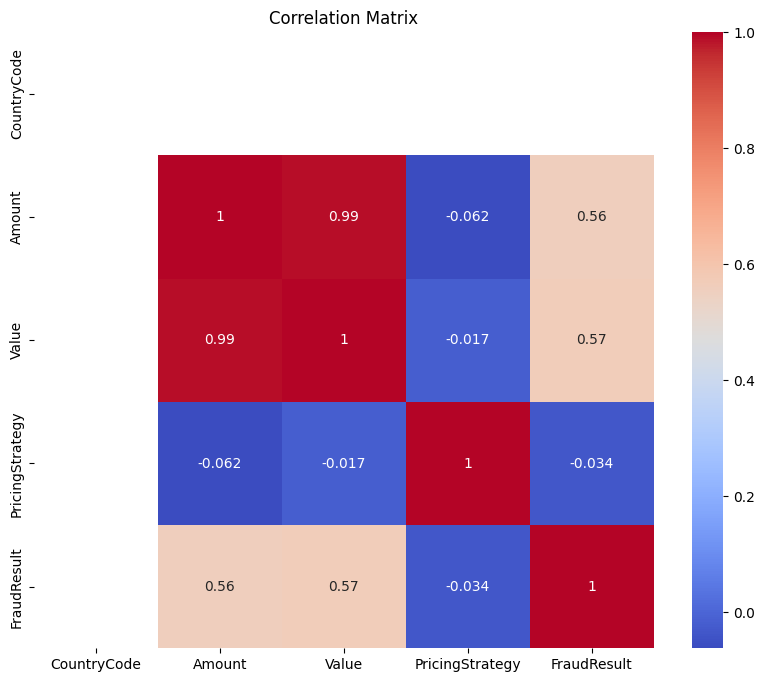

In [9]:
pipeline.analyze_correlation(df)

In [ ]:
pipeline.visualize_categorical_features(df)

In [ ]:
pipeline.visualize_numerical_features(df)